In [1]:
import numpy as np
from scipy.linalg import sqrtm, eigh
import matplotlib.pyplot as plt


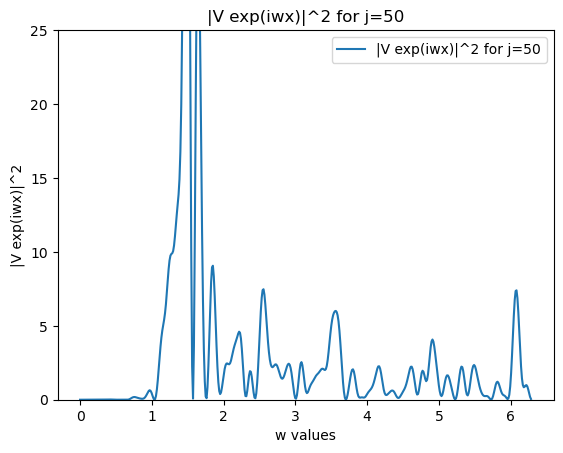

In [12]:
def my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, j=1):
    x = np.random.uniform(x_min, x_max, n)

    # Calculate pairwise distances
    d = np.sqrt((x[:, None]-x)**2)

    # Covariance matrix
    cov_mat = theta * np.exp(-d / range_val)

    # Eigen decomposition
    eig_val, eig_vec = np.linalg.eig(cov_mat)

    # Generate multivariate normal data
    sim_data = np.random.multivariate_normal(mean=np.zeros(n), cov=cov_mat)

    # Generate a range of frequencies (w values)
    w_values = np.linspace(0, 2 * np.pi, num=n)

    # Calculate the squared absolute value of V exp(iwx)
    tmp = np.exp(1j * np.outer(x, w_values))  # 1j represents the imaginary unit (sqrt(-1)).
    out = np.abs(np.dot(eig_vec.T, tmp))**2

    # Plot the result
    plt.plot(w_values, out[j-1,], label=f'|V exp(iwx)|^2 for j={j}')
    plt.xlabel('w values')
    plt.ylabel('|V exp(iwx)|^2')
    plt.title(f'|V exp(iwx)|^2 for j={j}')
    plt.legend()
    plt.ylim(0, 25)  # Set y-axis limits
    plt.show()

# Example usage
my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, j=50)

